# Check Eric's a3/a5ss figure to make sure he's not swapping labels
- d like you to just look at and confirm that I’m not swapping the labels for the a3 and a5ss events (ExtendedDataFigure19_20180629) 
- I believe that ‘longer’ = proximal 3’ss (or 5’ss) is increased upon RBP knockdown, but I’d like you to check and make sure I’m not messing up? 😊 just see if they look right to you generally 

- longer = 'proximal 5' splice site increased upon RBP knockdown', so let's check whether or not if i re-create the figure using the 'longer' means, that it looks like the figures titled 'proximal 5' splice site increased upon rbp knockdown'

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
from collections import OrderedDict

In [2]:
# specify wd
a3ss_dir = '/projects/ps-yeolab3/bay001/maps/current/a3ss/'
a5ss_dir = '/projects/ps-yeolab3/bay001/maps/current/a5ss/'

In [29]:
# let's try and recreate these rbps for now
rbps = OrderedDict({
    '393_01':'SF3A3-HepG2',
    '393_02':'SF3A3-HepG2',
    '228_01':'SF3B4-HepG2',
    '228_02':'SF3B4-HepG2',
    '272_01':'U2AF2-HepG2',
    '272_02':'U2AF2-HepG2',
    '301_01':'SRSF1-HepG2',
    '301_02':'SRSF1-HepG2'
})

longer_kds = []
longer_kds_ctrl = []
shorter_kds = []
shorter_kds_ctrl = []

for uid, rbp in rbps.iteritems():
    longer_kds.append(glob.glob(os.path.join(a3ss_dir, '{}*A3SSlonger-isoform-included-upon-knockdown.means.txt'.format(uid)))[0])
    longer_kds_ctrl.append(glob.glob(os.path.join(a3ss_dir, '{}*HepG2-longer-isoform-in-majority-of-controls.means.txt'.format(uid)))[0])
    # longer_kds_ctrl.append(glob.glob(os.path.join(a3ss_dir, '{}*HepG2-mixed-psi-isoform-in-majority-of-controls.means.txt'.format(uid)))[0])
    shorter_kds.append(glob.glob(os.path.join(a3ss_dir, '{}*A3SSshorter-isoform-included-upon-knockdown.means.txt'.format(uid)))[0])
    shorter_kds_ctrl.append(glob.glob(os.path.join(a3ss_dir, '{}*HepG2-shorter-isoform-in-majority-of-controls.means.txt'.format(uid)))[0])
    # shorter_kds_ctrl.append(glob.glob(os.path.join(a3ss_dir, '{}*HepG2-shorter-isoform-in-majority-of-controls.means.txt'.format(uid)))[0])

In [30]:
# let's try and recreate these rbps for now
rbps = OrderedDict({
    '670_01':'AQR-K562', 
    '670_02':'AQR-K562',
    '668_01':'PUS1-K562', 
    '668_02':'PUS1-K562',
})

for uid, rbp in rbps.iteritems():
    longer_kds.append(glob.glob(os.path.join(a3ss_dir, '{}*A3SSlonger-isoform-included-upon-knockdown.means.txt'.format(uid)))[0])
    longer_kds_ctrl.append(glob.glob(os.path.join(a3ss_dir, '{}*K562-longer-isoform-in-majority-of-controls.means.txt'.format(uid)))[0])
    # longer_kds_ctrl.append(glob.glob(os.path.join(a3ss_dir, '{}*HepG2-mixed-psi-isoform-in-majority-of-controls.means.txt'.format(uid)))[0])
    shorter_kds.append(glob.glob(os.path.join(a3ss_dir, '{}*A3SSshorter-isoform-included-upon-knockdown.means.txt'.format(uid)))[0])
    shorter_kds_ctrl.append(glob.glob(os.path.join(a3ss_dir, '{}*K562-shorter-isoform-in-majority-of-controls.means.txt'.format(uid)))[0])
    # shorter_kds_ctrl.append(glob.glob(os.path.join(a3ss_dir, '{}*HepG2-shorter-isoform-in-majority-of-controls.means.txt'.format(uid)))[0])

In [31]:
def combine_means(fns):
    merged = pd.DataFrame(index=range(1400))
    for fn in fns:
        df = pd.read_table(fn, names=['{}'.format(os.path.basename(fn)[:11])])
        merged = pd.merge(merged, df, how='left', left_index=True, right_index=True)
    return merged.T

In [32]:
longer = combine_means(longer_kds)
longerc = combine_means(longer_kds_ctrl)
longersub = longer - longerc

Text(0.5,1,u'A3SS longer = distal 3 splice site increased upon knockdown')

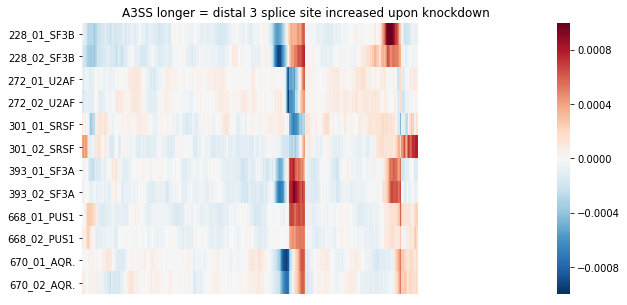

In [38]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(
    longersub.sort_index(), 
    xticklabels=False, 
    yticklabels=True, 
    cmap='RdBu_r', 
    center=0, 
    ax=ax,
    vmin=-0.001,
    vmax=0.001
)
plt.title('A3SS longer = proximal 3 splice site increased upon knockdown')

Text(0.5,1,u'A3SS shorter = distal 3 splice site increased upon knockdown')

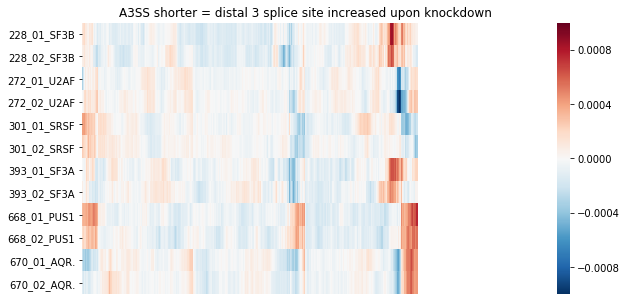

In [37]:
shorter = combine_means(shorter_kds)
shorterc = combine_means(shorter_kds_ctrl)
sub = shorter - shorterc

fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(
    sub.sort_index(), 
    xticklabels=False, 
    yticklabels=True, 
    cmap='RdBu_r', 
    center=0, 
    ax=ax,
    vmin=-0.001,
    vmax=0.001
)
plt.title('A3SS shorter = distal 3 splice site increased upon knockdown')

In [48]:
# a5ss
# let's try and recreate these rbps for now

longer_kds = []
longer_kds_ctrl = []
shorter_kds = []
shorter_kds_ctrl = []

# let's try and recreate these rbps for now
rbps = OrderedDict({
    '670_01':'AQR-K562', 
    '670_02':'AQR-K562',
    '668_01':'PUS1-K562', 
    '668_02':'PUS1-K562',
    '242_01':'U2AF2-K562', 
    '242_02':'U2AF2-K562',
    '514_01':'RBM15-K562', 
    '514_02':'RBM15-K562',
})

for uid, rbp in rbps.iteritems():
    longer_kds.append(glob.glob(os.path.join(a5ss_dir, '{}*A5SSlonger-isoform-included-upon-knockdown.means.txt'.format(uid)))[0])
    longer_kds_ctrl.append(glob.glob(os.path.join(a5ss_dir, '{}*K562-longer-isoform-in-majority-of-controls.means.txt'.format(uid)))[0])
    shorter_kds.append(glob.glob(os.path.join(a5ss_dir, '{}*A5SSshorter-isoform-included-upon-knockdown.means.txt'.format(uid)))[0])
    shorter_kds_ctrl.append(glob.glob(os.path.join(a5ss_dir, '{}*K562-shorter-isoform-in-majority-of-controls.means.txt'.format(uid)))[0])


In [49]:
# let's try and recreate these rbps for now
rbps = OrderedDict({
    '291_01':'PRPF8-HepG2', 
    '291_02':'PRPF8-HepG2',
    '272_01':'U2AF2-HepG2', 
    '272_02':'U2AF2-HepG2',
})

for uid, rbp in rbps.iteritems():
    longer_kds.append(glob.glob(os.path.join(a5ss_dir, '{}*A5SSlonger-isoform-included-upon-knockdown.means.txt'.format(uid)))[0])
    longer_kds_ctrl.append(glob.glob(os.path.join(a5ss_dir, '{}*HepG2-longer-isoform-in-majority-of-controls.means.txt'.format(uid)))[0])
    shorter_kds.append(glob.glob(os.path.join(a5ss_dir, '{}*A5SSshorter-isoform-included-upon-knockdown.means.txt'.format(uid)))[0])
    shorter_kds_ctrl.append(glob.glob(os.path.join(a5ss_dir, '{}*HepG2-shorter-isoform-in-majority-of-controls.means.txt'.format(uid)))[0])


Text(0.5,1,u'A5SS longer = proximal 3 splice site increased upon knockdown')

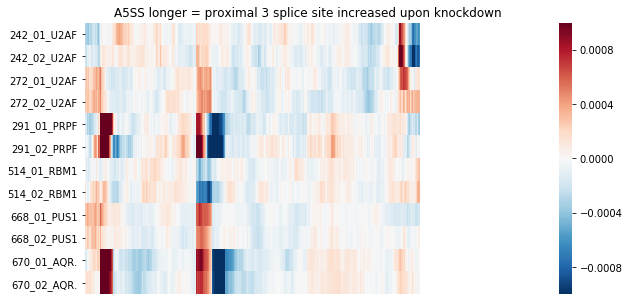

In [50]:
longer = combine_means(longer_kds)
longerc = combine_means(longer_kds_ctrl)
longersub = longer - longerc

fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(
    longersub.sort_index(), 
    xticklabels=False, 
    yticklabels=True, 
    cmap='RdBu_r', 
    center=0, 
    ax=ax,
    vmin=-0.001,
    vmax=0.001
)
plt.title('A5SS longer = proximal 3 splice site increased upon knockdown')

Text(0.5,1,u'A5SS shorter = distal 3 splice site increased upon knockdown')

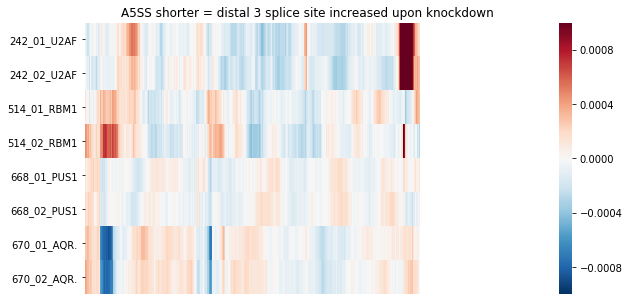

In [47]:
shorter = combine_means(shorter_kds)
shorterc = combine_means(shorter_kds_ctrl)
shortersub = shorter - shorterc

fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(
    shortersub.sort_index(), 
    xticklabels=False, 
    yticklabels=True, 
    cmap='RdBu_r', 
    center=0, 
    ax=ax,
    vmin=-0.001,
    vmax=0.001
)
plt.title('A5SS shorter = distal 3 splice site increased upon knockdown')